Model Accuracy: 80.24%
Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.70      0.78        84
           2       0.75      0.90      0.82        83

    accuracy                           0.80       167
   macro avg       0.82      0.80      0.80       167
weighted avg       0.82      0.80      0.80       167



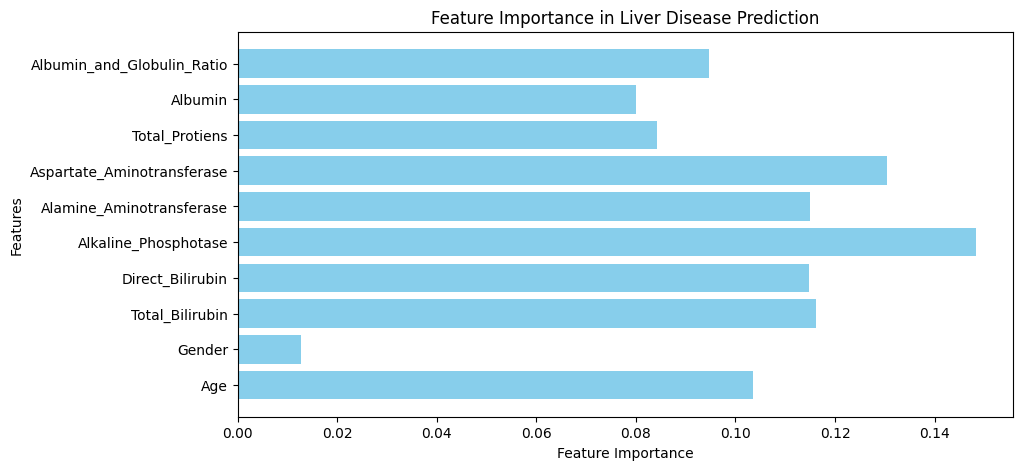

Model saved as 'liver_disease_model.pkl'


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\Dell\Desktop\ML project\data_set\indian_liver_patient.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Handle missing values in 'Albumin_and_Globulin_Ratio'
imputer = SimpleImputer(strategy="mean")
df["Albumin_and_Globulin_Ratio"] = imputer.fit_transform(df[["Albumin_and_Globulin_Ratio"]])

# Encode 'Gender' (Male=1, Female=0)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Define features and target
X = df.drop(columns=["Dataset"])  # Features
y = df["Dataset"]  # Target (1: Liver Disease, 2: No Liver Disease)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train the improved model with class weight adjustment
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

# Feature importance visualization
feature_importance = model.feature_importances_
features = df.drop(columns=["Dataset"]).columns

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Liver Disease Prediction")
plt.show()

# Save the improved model
joblib.dump(model, "liver_disease_model.pkl")
print("Model saved as 'liver_disease_model.pkl'")


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [8]:
# Load dataset
file_path = r"C:\Users\Dell\Desktop\ML project\data_set\indian_liver_patient.csv"  # Update this path if needed
df = pd.read_csv(file_path)

In [9]:
# Handle missing values in 'Albumin_and_Globulin_Ratio'
imputer = SimpleImputer(strategy="mean")
df["Albumin_and_Globulin_Ratio"] = imputer.fit_transform(df[["Albumin_and_Globulin_Ratio"]])

Model Accuracy: 80.24%
Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.70      0.78        84
           2       0.75      0.90      0.82        83

    accuracy                           0.80       167
   macro avg       0.82      0.80      0.80       167
weighted avg       0.82      0.80      0.80       167



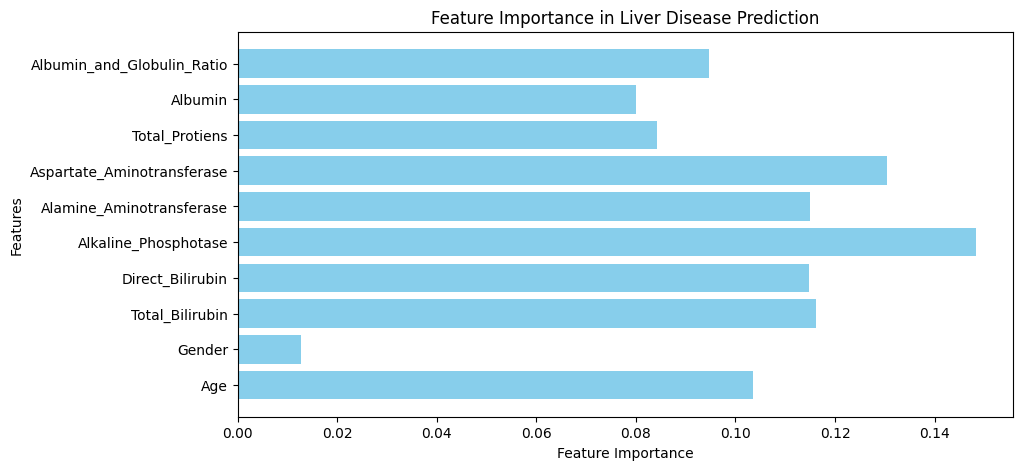

Model saved as 'liver_disease_model.pkl'


In [10]:
# Encode 'Gender' (Male=1, Female=0)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Define features and target
X = df.drop(columns=["Dataset"])  # Features
y = df["Dataset"]  # Target (1: Liver Disease, 2: No Liver Disease)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train the improved model with class weight adjustment
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

# Feature importance visualization
feature_importance = model.feature_importances_
features = df.drop(columns=["Dataset"]).columns

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Liver Disease Prediction")
plt.show()

# Save the improved model
joblib.dump(model, "liver_disease_model.pkl")
print("Model saved as 'liver_disease_model.pkl'")